In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from ts.data.generate.univariate.nonexo import StandardGenerator
from ts.utility import Utility
from ts.plot import Plot
from ts.model import GruForecast

In [15]:
def tryGruModel(
    targetSeries, 
    exogenousSeries, 
    trainSize,
    seqLength,
    forecastHorizon=1,
    stateSize=10,
    numRnnLayers=1,
    optimizer=tf.optimizers.Adam(0.05),
    numIterations=10
):

    (targetTrain, exoTrain), (targetTest, exoTest) = Utility.trainTestSplitSeries(
        targetSeries=targetSeries,
        exogenousSeries=exogenousSeries,
        train=trainSize
    )

    trainSequences = Utility.breakTrainSeq(
        targetSeries=targetTrain,
        exogenousSeries=exoTrain,
        seqLength=seqLength,
        forecastHorizon=forecastHorizon
    )
    
    numTargetVariables = targetSeries.shape[1]
    numExoVariables = exogenousSeries.shape[1]

    model = GruForecast(
        forecastHorizon=forecastHorizon,
        stateSize=stateSize,
        numRnnLayers=numRnnLayers,
        numTargetVariables=numTargetVariables,
        numExoVariables=numExoVariables
    )

    losses = model.train(
        trainSequences=trainSequences,
        numIterations=numIterations,
        optimizer=optimizer
    )
    
    Plot.plotLoss(losses)
    
    testLoss, pred = model.evaluate(
        targetSeries=targetTest,
        exogenousSeries=exoTest[:exoTest.shape[0] - forecastHorizon],
        returnPred=True
    )

    target = targetTest[forecastHorizon:]

    print(target.shape, pred.shape)
    print(testLoss)
    
    for i in range(numTargetVariables):
        Plot.plotPredTrue(pred[:, i], target[:, i])

# Data 1

In [16]:
dataGen = StandardGenerator('simple')

In [17]:
n = 5000

exoSeq1 = np.expand_dims(dataGen.generate(n), axis=1)
exoSeq2 = np.expand_dims(dataGen.generate(n), axis=1)
exogenousSeries = np.concatenate(
    (exoSeq1, exoSeq2),
    axis=1
)

targetSeries = exoSeq1 + exoSeq2

print(exogenousSeries.shape, targetSeries.shape)

(5000, 2) (5000, 1)


Epoch 1/10
8/8 [==============================] - 1s 158ms/step - loss: 3.1951
Epoch 2/10
8/8 [==============================] - 1s 174ms/step - loss: 2.3647
Epoch 3/10
8/8 [==============================] - 1s 171ms/step - loss: 2.1585
Epoch 4/10
8/8 [==============================] - 1s 158ms/step - loss: 2.0620
Epoch 5/10
8/8 [==============================] - 1s 162ms/step - loss: 2.0322
Epoch 6/10
8/8 [==============================] - 1s 160ms/step - loss: 2.0061
Epoch 7/10
8/8 [==============================] - 1s 154ms/step - loss: 1.9832
Epoch 8/10
8/8 [==============================] - 1s 165ms/step - loss: 1.9842
Epoch 9/10
8/8 [==============================] - 1s 169ms/step - loss: 1.9769
Epoch 10/10
8/8 [==============================] - 1s 181ms/step - loss: 1.9980


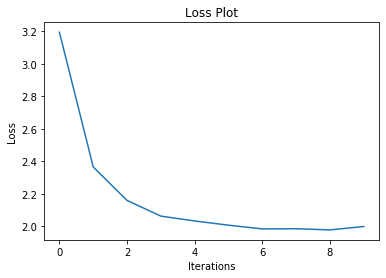

(999, 1) (999, 1)
tf.Tensor(2.0529928, shape=(), dtype=float32)


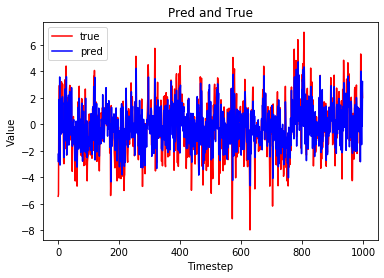

In [18]:
tryGruModel(
    targetSeries, 
    exogenousSeries,
    trainSize=4000,
    seqLength=500,
    forecastHorizon=1
)

# Data 2

In [19]:
dataGen = StandardGenerator('simple')

In [20]:
n = 5000

exoSeq1 = np.expand_dims(dataGen.generate(n), axis=1)
exoSeq2 = np.expand_dims(dataGen.generate(n), axis=1)
exoSeq3 = np.expand_dims(dataGen.generate(n), axis=1)
exoSeq4 = np.expand_dims(dataGen.generate(n), axis=1)
exogenousSeries = np.concatenate(
    (exoSeq1, exoSeq2, exoSeq3, exoSeq4),
    axis=1
)

targetSeries = exoSeq1 + 2 * exoSeq2 - exoSeq3 + 4 * exoSeq4

print(targetSeries.shape, exogenousSeries.shape)

(5000, 1) (5000, 4)


Epoch 1/10
8/8 [==============================] - 1s 146ms/step - loss: 38.0842
Epoch 2/10
8/8 [==============================] - 1s 138ms/step - loss: 28.4653
Epoch 3/10
8/8 [==============================] - 1s 157ms/step - loss: 26.8419
Epoch 4/10
8/8 [==============================] - 1s 150ms/step - loss: 26.1005
Epoch 5/10
8/8 [==============================] - 1s 170ms/step - loss: 25.6643
Epoch 6/10
8/8 [==============================] - 1s 158ms/step - loss: 25.9258
Epoch 7/10
8/8 [==============================] - 1s 173ms/step - loss: 25.5048
Epoch 8/10
8/8 [==============================] - 1s 167ms/step - loss: 25.4468
Epoch 9/10
8/8 [==============================] - 1s 166ms/step - loss: 25.3089
Epoch 10/10
8/8 [==============================] - 1s 156ms/step - loss: 24.8679


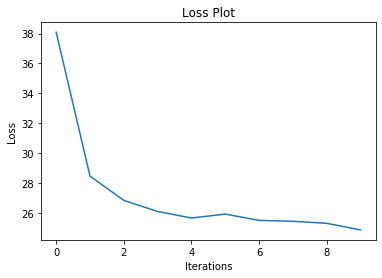

(999, 1) (999, 1)
tf.Tensor(23.949749, shape=(), dtype=float32)


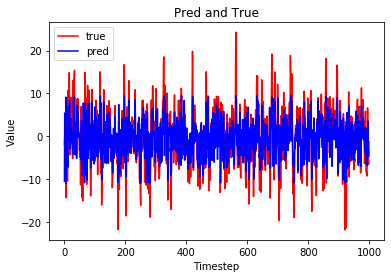

In [21]:
tryGruModel(
    targetSeries, 
    exogenousSeries,
    trainSize=4000,
    seqLength=500,
    forecastHorizon=1
)

# Data 3

In [22]:
dataGen = StandardGenerator('simple')

In [23]:
n = 5000

exoSeq1 = np.expand_dims(dataGen.generate(n), axis=1)
exoSeq2 = np.expand_dims(dataGen.generate(n), axis=1)
exoSeq3 = np.expand_dims(dataGen.generate(n), axis=1)
exoSeq4 = np.expand_dims(dataGen.generate(n), axis=1)
exogenousSeries = np.concatenate(
    (exoSeq1, exoSeq2, exoSeq3, exoSeq4),
    axis=1
)

targetSeries = np.concatenate((
    exoSeq1 + 2 * exoSeq2 - exoSeq3 + 4 * exoSeq4,
    exoSeq1 - exoSeq4,
    exoSeq2 + 5 * exoSeq3
), axis=1)

print(targetSeries.shape, exogenousSeries.shape)

(5000, 3) (5000, 4)


Epoch 1/10
8/8 [==============================] - 2s 288ms/step - loss: 28.2489
Epoch 2/10
8/8 [==============================] - 2s 300ms/step - loss: 23.0862
Epoch 3/10
8/8 [==============================] - 3s 328ms/step - loss: 22.0991
Epoch 4/10
8/8 [==============================] - 3s 348ms/step - loss: 21.6019
Epoch 5/10
8/8 [==============================] - 2s 283ms/step - loss: 21.8759
Epoch 6/10
8/8 [==============================] - 2s 283ms/step - loss: 21.6620
Epoch 7/10
8/8 [==============================] - 2s 294ms/step - loss: 21.5971
Epoch 8/10
8/8 [==============================] - 2s 252ms/step - loss: 21.2843
Epoch 9/10
8/8 [==============================] - 2s 298ms/step - loss: 21.1583
Epoch 10/10
8/8 [==============================] - 3s 329ms/step - loss: 21.4646


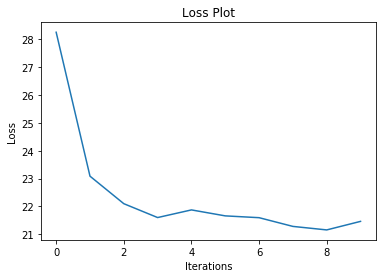

(999, 3) (999, 3)
tf.Tensor(23.263422, shape=(), dtype=float32)


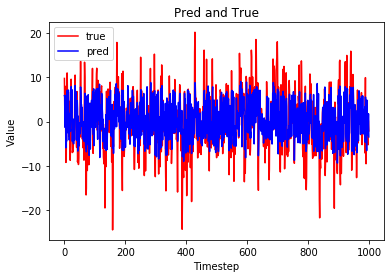

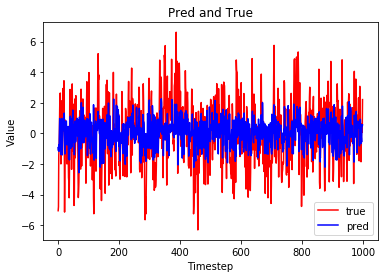

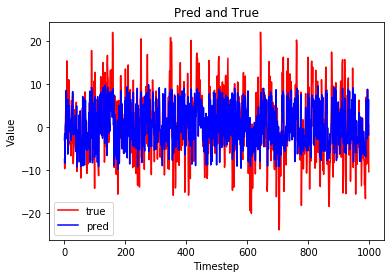

In [26]:
tryGruModel(
    targetSeries, 
    exogenousSeries,
    trainSize=4000,
    seqLength=500,
    forecastHorizon=1,
    stateSize=20,
    numRnnLayers=2,
    optimizer=tf.optimizers.Adam(0.1)
)